In [21]:
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns


In [22]:
X=np.loadtxt('X_train.txt')
n_samples, n_features=X.shape
n_samples, n_features

(7352, 561)

In [23]:
treshhold=0.1
selector=VarianceThreshold(threshold=treshhold)
X_reduced_variance=selector.fit_transform(X)
X_reduced_variance.shape[1]

189

In [24]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_reduced_variance)


In [25]:
pca=PCA()
X_pca=pca.fit_transform(X_scaled)

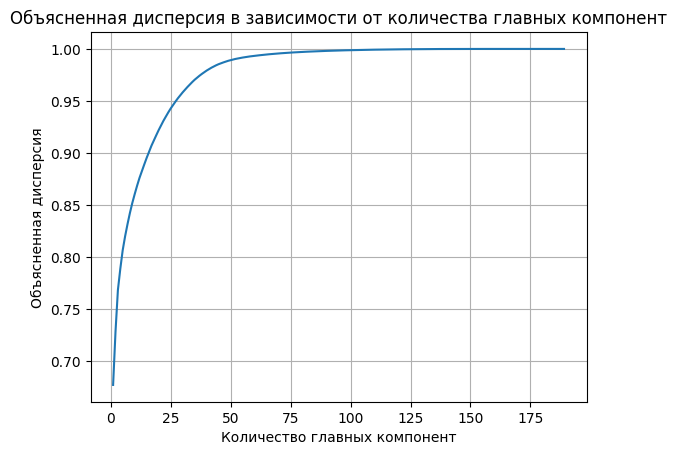

In [26]:
explained_variance=np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1,len(explained_variance)+1), explained_variance)
plt.xlabel('Количество главных компонент')
plt.ylabel('Объясненная дисперсия')
plt.title('Объясненная дисперсия в зависимости от количества главных компонент')
plt.grid()
plt.show()

In [27]:
n_components_90=np.argmax(explained_variance >=0.90)+1
n_components_90

np.int64(16)

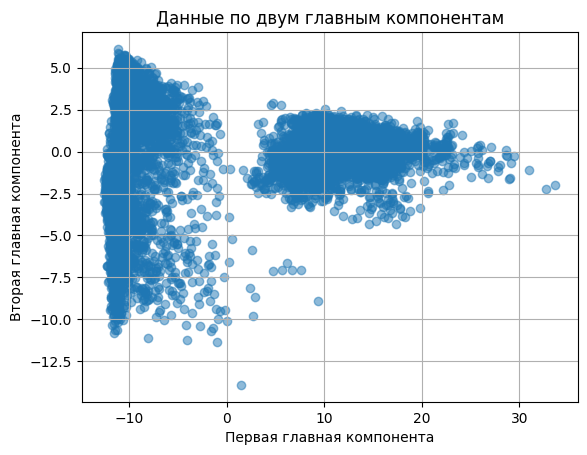

In [28]:
pca_2d=PCA(n_components=2)
X_pca_2d=pca_2d.fit_transform(X_scaled)
plt.scatter(X_pca_2d[:,0], X_pca_2d[:,1], alpha=0.5)
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.title('Данные по двум главным компонентам')
plt.grid()
plt.show()

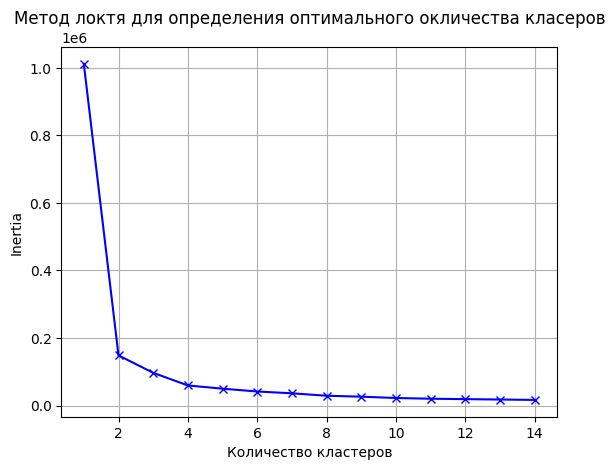

In [29]:
inertia=[]
K=range(1,15)
for k in K:
    kmeans=KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_pca_2d)
    inertia.append(kmeans.inertia_)
plt.plot(K, inertia, 'bx-')
plt.xlabel('Количество кластеров')
plt.ylabel('Inertia')
plt.title('Метод локтя для определения оптимального окличества класеров')
plt.grid()
plt.show()

In [30]:
optimal_k=2
kmeans=KMeans(n_clusters=optimal_k, random_state=0)
labels=kmeans.fit_predict(X_pca_2d)

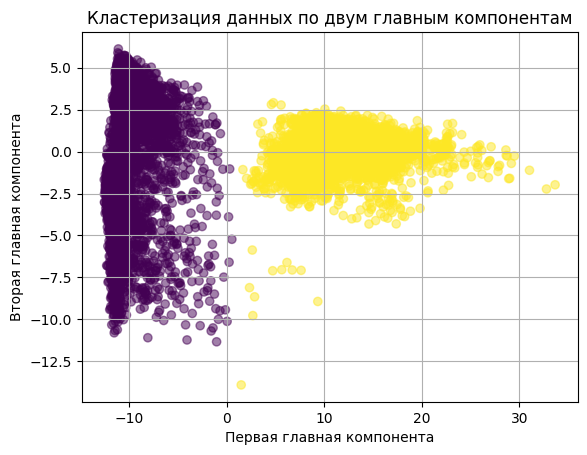

In [31]:
plt.scatter(X_pca_2d[:,0], X_pca_2d[:,1], c=labels, cmap='viridis', alpha=0.5)
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.title('Кластеризация данных по двум главным компонентам')
plt.grid()
plt.show()

In [32]:
activity_labels=np.loadtxt('activity_labels.txt', dtype=str)
activity_dict={int(row[0]):row[1] for row in activity_labels}
print(activity_dict)

{1: np.str_('WALKING'), 2: np.str_('WALKING_UPSTAIRS'), 3: np.str_('WALKING_DOWNSTAIRS'), 4: np.str_('SITTING'), 5: np.str_('STANDING'), 6: np.str_('LAYING')}


In [33]:
y=np.loadtxt('y_train.txt')

In [34]:
y_labels=[activity_dict[label] for label in y]



In [35]:
df=pd.DataFrame({'Cluster':labels, 'Activity': y_labels})

In [36]:
pivot_table=pd.crosstab(df['Activity'], df['Cluster'])
print(pivot_table)

Cluster                0     1
Activity                      
LAYING              1396    11
SITTING             1285     1
STANDING            1374     0
WALKING                0  1226
WALKING_DOWNSTAIRS     0   986
WALKING_UPSTAIRS       0  1073


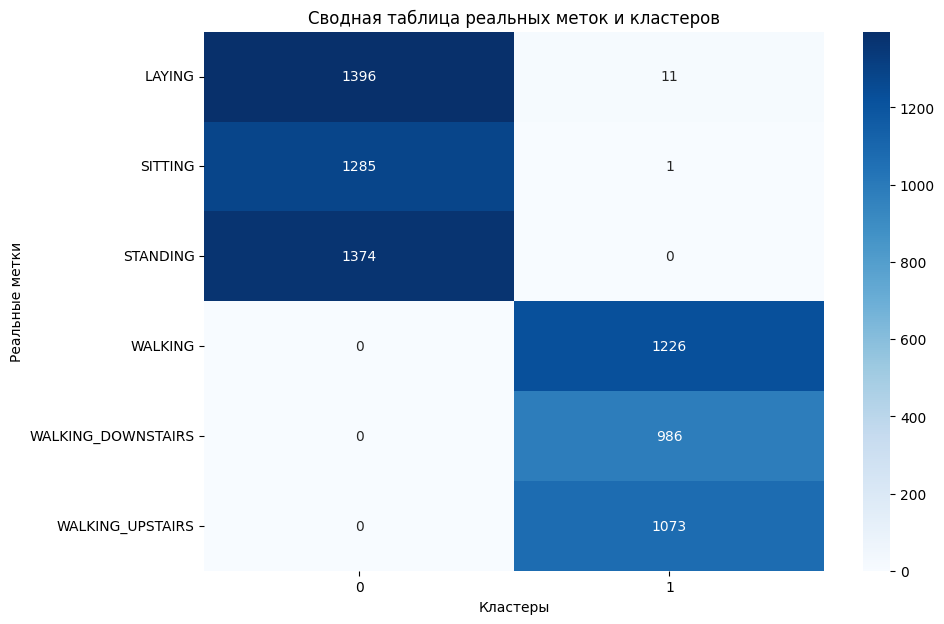

In [37]:
plt.figure(figsize=(10,7))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Кластеры')
plt.ylabel('Реальные метки')
plt.title('Сводная таблица реальных меток и кластеров')
plt.show()

Похожие активности объндинились в один кластер. Ходьба по ступенькам вниз в верх и лежание стояние сидение. 